In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [5]:
#loading the data
df = pd.read_csv(r'C:\Users\ABCD\OneDrive\Documents\_CP30-EduSpend\SDS-CP030-edu-spend\submissions\team-members\lakshay-yadav\data\International_Education_Costs.csv')
df.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [7]:
df.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [9]:
# Check for missing data
df.isnull().sum().sort_values(ascending=False)

# Percentage of missing values
df.isnull().mean() * 100

Country              0.0
City                 0.0
University           0.0
Program              0.0
Level                0.0
Duration_Years       0.0
Tuition_USD          0.0
Living_Cost_Index    0.0
Rent_USD             0.0
Visa_Fee_USD         0.0
Insurance_USD        0.0
Exchange_Rate        0.0
dtype: float64

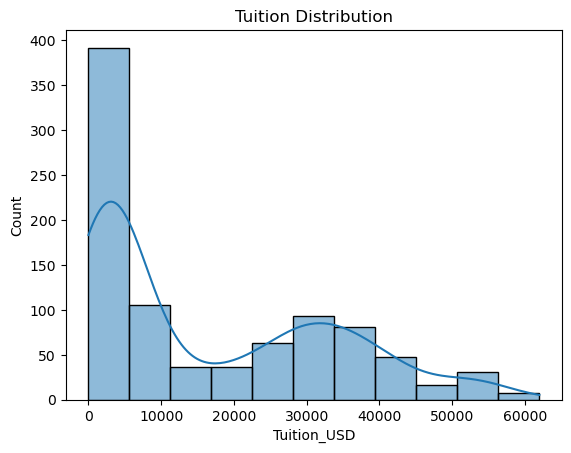

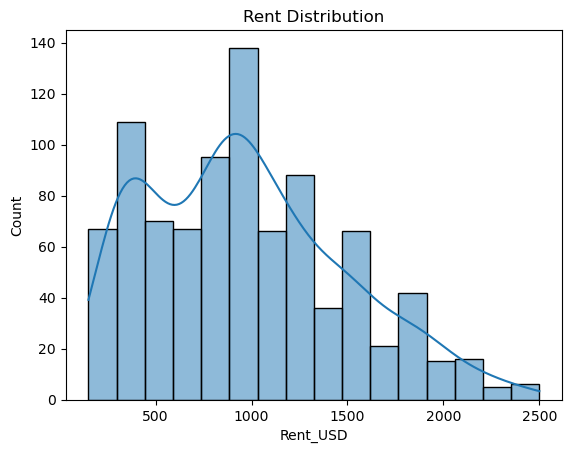

In [10]:
# Tuition Distribution
sns.histplot(df['Tuition_USD'], kde=True)
plt.title('Tuition Distribution')
plt.show()

# Rent Distribution
sns.histplot(df['Rent_USD'], kde=True)
plt.title('Rent Distribution')
plt.show()

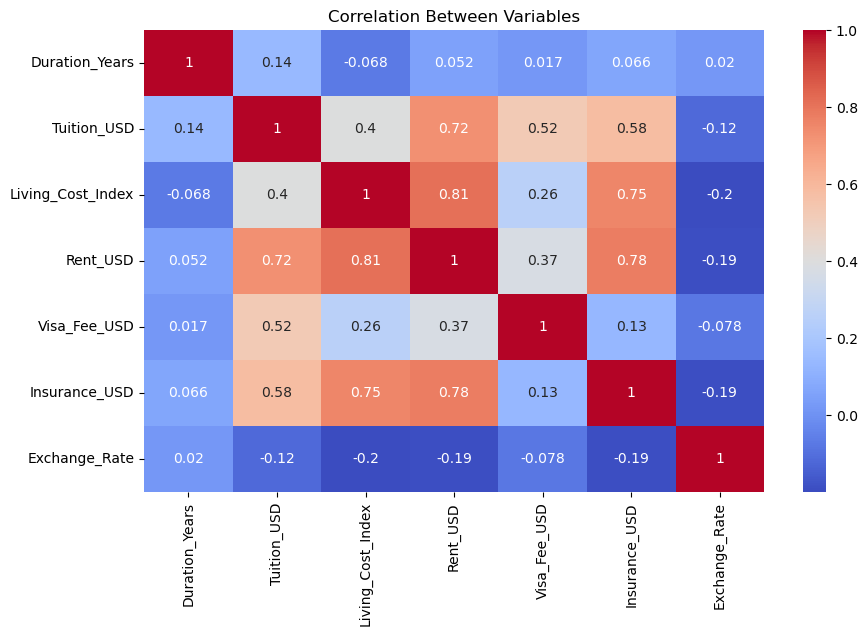

In [12]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()


In [ ]:
# Assume standard duration and months
DURATION_YEARS = 1
MONTHS = 12

df['TCA'] = df['Tuition_USD'] + (df['Rent_USD'] * MONTHS) + df['Visa_Fee_USD'] + (df['Insurance_USD'] * DURATION_YEARS)
df[['Country', 'City', 'Level', 'TCA']].head()

In [17]:
import plotly.express as px

# Average TCA by Country
avg_tca_country = df.groupby('Country')['TCA'].mean().reset_index()
fig = px.bar(avg_tca_country.sort_values(by='TCA', ascending=False), x='Country', y='TCA', title='Average TCA by Country')
fig.show()

# TCA by Level
fig = px.box(df, x='Level', y='TCA', title='TCA Distribution by Degree Level')
fig.show()


In [18]:
# Label as Low/Medium/High using quantiles
df['Affordability_Tier'] = pd.qcut(df['TCA'], q=3, labels=['Low', 'Medium', 'High'])
df[['TCA', 'Affordability_Tier']].head()


,TCA,Affordability_Tier
0,83460,High
1,64085,High
2,58835,High
3,59900,High
4,14325,Medium


In [20]:
# Visualizing TCA by Affordability Tier
fig = px.box(df, x='Affordability_Tier', y='TCA', title='TCA Distribution by Affordability Tier')
fig.show()